<a href="https://www.kaggle.com/code/trnthanhnguyn/vnm-poem?scriptVersionId=180414304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
!pip install underthesea


In [1]:
!pip install pyvi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 50.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.8 MB/s eta 0:00:00


In [2]:

import os
import re

# Define the file path
file_path = '/kaggle/input/kieu-poem/kieu poem.txt'

# Step 1: Read the file content
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Step 2: Preprocess the text
# Remove line numbers and any annotations in parentheses
processed_text = re.sub(r'\(\d{4}\)', '', text)  # Remove line numbers (e.g., (0001))
processed_text = re.sub(r'\s*–\s*\([\w\s,]+\)', '', processed_text)  # Remove annotations in parentheses (e.g., – (sắc))

# Remove leading and trailing whitespace from each line
processed_text = '\n'.join(line.strip() for line in processed_text.splitlines())

# Remove extra newlines
processed_text = re.sub(r'\n+', '\n', processed_text)

# Step 3: Split the text into a list of sentences
sentences = [line for line in processed_text.split('\n') if line]

# Print the list of sentences


In [54]:
print(len(tokenized_sentences))


3219


In [3]:
from pyvi import ViTokenizer
tokenized_sentences = []
for sentence in sentences:
    tokens = ViTokenizer.tokenize(sentence)
    tokenized_sentences.append(tokens)

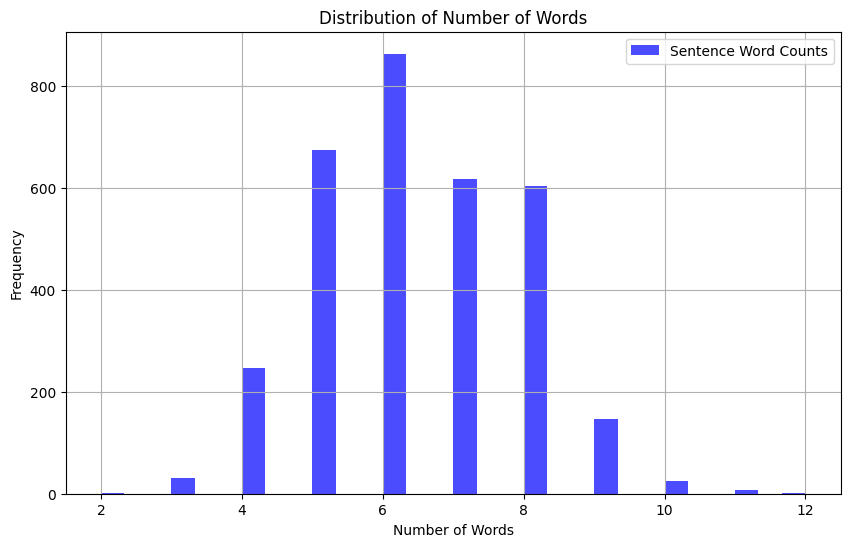

In [4]:
import matplotlib.pyplot as plt

# Function to count number of words
def count_words(text):
    return len(text.split())


import matplotlib.pyplot as plt

# Function to count number of words
def count_words(text):
    return len(text.split())
# Count number of words for each question and essay

# Count number of words for each sentence
sentences_counts = [count_words(sentence) for sentence in tokenized_sentences]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(sentences_counts, bins=30, color='blue', alpha=0.7, label='Sentence Word Counts')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sentences)
sequences = tokenizer.texts_to_sequences(tokenized_sentences)

max_length = 8  # Adjust as needed

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Print padded sequences
print(padded_sequences.shape)

2024-05-29 06:45:00.338815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 06:45:00.338909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 06:45:00.463514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(3219, 8)


In [6]:
X=[]
Y=[]
for i in range(len(tokenized_sentences)-1):
    X.append(tokenized_sentences[i])
    Y.append(tokenized_sentences[i+1])

In [7]:
max_length = 8  # Adjust as needed
Xsequences = tokenizer.texts_to_sequences(X)
Ysequences = tokenizer.texts_to_sequences(Y)
Xsequences = pad_sequences(Xsequences, maxlen=max_length, padding='post', truncating='post')
Ysequences = pad_sequences(Ysequences, maxlen=max_length, padding='post', truncating='post')


In [8]:
print(Xsequences.shape)
print(Ysequences.shape)

(3218, 8)
(3218, 8)


In [9]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
print(VOCAB_SIZE)

2359


In [11]:
import pandas as pd
import numpy as np
import re,string
from gensim.models import KeyedVectors
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import preprocessing, utils, activations
# from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')
fastText_model = KeyedVectors.load_word2vec_format('../input/wiki-vi-vectors/wiki.vi.vec')
print("FastText Loaded!")

FastText Loaded!


In [12]:
word2idx = tokenizer.word_index


In [13]:
embeddings_dim = 300

embedding_matrix = np.zeros((VOCAB_SIZE, embeddings_dim))

for word, index in word2idx.items():
    try:
        embedding_matrix[index,:] = fastText_model[word]
    except:
        continue
        
print(embedding_matrix.shape)

(2359, 300)


In [14]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Concatenate, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Conv1D, GRU
from tensorflow.keras.layers import Conv1D, BatchNormalization, LSTM,GlobalAveragePooling1D,GlobalAveragePooling2D
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer,BatchNormalization,Conv1D
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate, Conv1D, GlobalMaxPooling1D, Bidirectional, GRU, Dot, Softmax

In [15]:
def Encoder(inputs,ffd, num_heads, embed_dim, dropout_rate):
  seq_length = inputs.shape[1]
  channels=inputs.shape[2]
  position_encodings = tf.Variable(tf.random.normal(shape=(seq_length, channels)))
  inputs=inputs+position_encodings
  attention_output = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=dropout_rate
        )(inputs,inputs)
  x = tf.keras.layers.Dropout(dropout_rate)(inputs)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

  x=tf.keras.layers.Dense(ffd, activation='gelu')(x)
  x=tf.keras.layers.Dropout(dropout_rate)(x)
  mlp_output=tf.keras.layers.Dense(embed_dim, activation='gelu')(x)

  x = tf.keras.layers.Dropazout(dropout_rate)(mlp_output)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(mlp_output + x)
  return x

In [16]:
def Decoder(inputs,context,ffd, num_heads, embed_dim, dropout_rate):

  seq_length = inputs.shape[1]
  channels=inputs.shape[2]
  context=tf.keras.layers.Dense(channels, activation='gelu')(context)

  position_encodings = tf.Variable(tf.random.normal(shape=(seq_length, channels)))
    
  inputs=inputs+position_encodings
  attention_output = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=dropout_rate
        )(inputs,context)
  x = tf.keras.layers.Dropout(dropout_rate)(inputs)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

  x=tf.keras.layers.Dense(ffd, activation='gelu')(x)
  x=tf.keras.layers.Dropout(dropout_rate)(x)
  mlp_output=tf.keras.layers.Dense(embed_dim, activation='gelu')(x)

  x = tf.keras.layers.Dropout(dropout_rate)(mlp_output)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(mlp_output + x)
  return x

In [17]:
def query_attention(inputs,ffd, embed_dim, dropout_rate):
  seq_length = inputs.shape[1]
  channels=inputs.shape[2]
  position_encodings = tf.Variable(tf.random.normal(shape=(seq_length, channels)))
  inputs=inputs+position_encodings
  num_heads=1
  attention_output = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=dropout_rate
        )(inputs,inputs)
  x = tf.keras.layers.Dropout(dropout_rate)(inputs)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

  x=tf.keras.layers.Dense(ffd, activation='gelu')(x)
  x=tf.keras.layers.Dropout(dropout_rate)(x)
  mlp_output=tf.keras.layers.Dense(embed_dim, activation='gelu')(x)

  x = tf.keras.layers.Dropout(dropout_rate)(mlp_output)
  x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(mlp_output + x)
  return x

In [18]:
embedding_matrix=np.array(embedding_matrix)

In [19]:
texts_input = tf.keras.Input(shape=(8,))

    # Initialize the Embedding layer
Ebd1 = Embedding(input_dim=VOCAB_SIZE, 
                            output_dim=embeddings_dim, 
                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
                            trainable=False)

Texts = Ebd1(texts_input)
num_heads=8
ffd=768
embed_dim=100
dropout_rate=0.2
input1=tf.keras.layers.Conv1D(filters=64*2*2, kernel_size=3,strides=1,padding='same', activation='relu')(Texts)
input1=BatchNormalization()(input1)

input2=tf.keras.layers.Conv1D(filters=64*2*2, kernel_size=3,strides=1,padding='same', activation='relu')(input1)
input2=BatchNormalization()(input2)



E1=query_attention(Texts,ffd, embed_dim, dropout_rate)
E2=Decoder(input2,E1,ffd, num_heads, embed_dim, dropout_rate)
E3=Decoder(E2,E1,ffd, num_heads, embed_dim, dropout_rate)
E4=Decoder(E3,E1,ffd, num_heads, embed_dim, dropout_rate)
encoder=concatenate([input2,E2,E3,E4],axis=-1)


D1=Decoder(input2,encoder,ffd, num_heads, embed_dim, dropout_rate)
D2=Decoder(input2,D1,ffd, num_heads, embed_dim, dropout_rate)
D3=Decoder(D2,encoder,ffd, num_heads, embed_dim, dropout_rate)
D4=Decoder(D3,encoder,ffd, num_heads, embed_dim, dropout_rate)

generation = Dense(VOCAB_SIZE, activation='softmax')(D4)
model=tf.keras.Model(inputs=[texts_input],outputs=[generation])



In [76]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 8, 300)    │    707,700 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 300)    │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 300)    │    120,600 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 300)    │          0 │ add[0][0],        │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 8, 300)    │        600 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8, 768)    │    231,168 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 8, 768)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 8, 256)    │    230,656 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8, 100)    │     76,900 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 8, 256)    │      1,024 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 8, 100)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 8, 256)    │    196,864 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 8, 100)    │          0 │ dense_1[0][0],    │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 256)    │      1,024 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 8, 100)    │        200 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 8, 256)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 256)    │     25,856 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 256)    │    821,856 │ add_3[0][0],      │
│ (MultiHeadAttentio… │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 8, 256)    │          0 │ add_3[0][0],    

 Total params: 7,330,903 (27.97 MB)

 Trainable params: 6,622,179 (25.26 MB)

 Non-trainable params: 708,724 (2.70 MB)

In [21]:
print(Xsequences.shape)
print(Ysequences.shape)

(3218, 8)
(3218, 8)


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=16
)
model.save_weights('model_weights.weights.h5')


Epoch 1/200
  8/202 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0733 - loss: 7.6435       

I0000 00:00:1716965446.751174     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716965446.810207     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


202/202 ━━━━━━━━━━━━━━━━━━━━ 135s 283ms/step - accuracy: 0.1215 - loss: 6.5941
Epoch 2/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1453 - loss: 5.7612
Epoch 3/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1440 - loss: 5.6076
Epoch 4/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1435 - loss: 5.5624
Epoch 5/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1457 - loss: 5.4880
Epoch 6/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1423 - loss: 5.4614
Epoch 7/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1446 - loss: 5.4085
Epoch 8/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1462 - loss: 5.3488
Epoch 9/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1452 - loss: 5.3219
Epoch 10/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1453 - loss: 5.2564
Epoch 11/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1511 - loss: 5.1756
Epoch 12/200
202/202 ━━━━━━━━━━━━━━━━━━

In [23]:
history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=16
)
model.save_weights('model_weights.weights.h5')

history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=32
)
model.save_weights('model_weights.weights.h5')

history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=48
)
model.save_weights('model_weights.weights.h5')


Epoch 1/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7494 - loss: 0.8719
Epoch 2/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7352 - loss: 0.9277
Epoch 3/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7318 - loss: 0.9451
Epoch 4/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7455 - loss: 0.8869
Epoch 5/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7319 - loss: 0.9280
Epoch 6/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7339 - loss: 0.9395
Epoch 7/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7535 - loss: 0.8757
Epoch 8/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7419 - loss: 0.9048
Epoch 9/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7312 - loss: 0.9360
Epoch 10/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7472 - loss: 0.8807
Epoch 11/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7451 - loss: 0.8818
Epoch 12/200
202/202 ━━━━━━━━━

W0000 00:00:1716966717.951614     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 106s 556ms/step - accuracy: 0.8766 - loss: 0.4162
Epoch 2/200
  8/101 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9117 - loss: 0.3293

W0000 00:00:1716966773.586372     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9095 - loss: 0.3146
Epoch 3/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9179 - loss: 0.2763
Epoch 4/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9227 - loss: 0.2636
Epoch 5/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9243 - loss: 0.2559
Epoch 6/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9263 - loss: 0.2481
Epoch 7/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9252 - loss: 0.2526
Epoch 8/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9309 - loss: 0.2503
Epoch 9/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9299 - loss: 0.2321
Epoch 10/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9283 - loss: 0.2479
Epoch 11/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9262 - loss: 0.2467
Epoch 12/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9271 - loss: 0.2459
Epoch 13/200
101/101 ━━━━━━━━━━━━━━━━━━━━

W0000 00:00:1716967155.232549     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


68/68 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - accuracy: 0.9449 - loss: 0.1834
Epoch 2/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8933 - loss: 0.3840
Epoch 3/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8848 - loss: 0.4194
Epoch 4/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8953 - loss: 0.3631
Epoch 5/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8794 - loss: 0.4445
Epoch 6/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9067 - loss: 0.3224
Epoch 7/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9119 - loss: 0.3015
Epoch 8/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9072 - loss: 0.3312
Epoch 9/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8945 - loss: 0.3892
Epoch 10/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9030 - loss: 0.3439
Epoch 11/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9193 - loss: 0.2798
Epoch 12/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy

In [24]:
history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=48
)
model.save_weights('model_weights.weights.h5')
history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=96
)
model.save_weights('model_weights.weights.h5')
history = model.fit(
    Xsequences, Ysequences,
    epochs=200,batch_size=48*3
)
model.save_weights('model_weights.weights.h5')

Epoch 1/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9182 - loss: 0.2767
Epoch 2/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9104 - loss: 0.3098
Epoch 3/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8992 - loss: 0.3610
Epoch 4/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9266 - loss: 0.2565
Epoch 5/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9044 - loss: 0.3414
Epoch 6/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9223 - loss: 0.2782
Epoch 7/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9296 - loss: 0.2484
Epoch 8/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9212 - loss: 0.2733
Epoch 9/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9324 - loss: 0.2378
Epoch 10/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9071 - loss: 0.3292
Epoch 11/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9008 - loss: 0.3601
Epoch 12/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

W0000 00:00:1716967708.168040     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8996 - loss: 0.3532
Epoch 2/200
 4/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9383 - loss: 0.2151

W0000 00:00:1716967765.587727     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9333 - loss: 0.2224
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9436 - loss: 0.1901
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9508 - loss: 0.1676
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9532 - loss: 0.1527
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9557 - loss: 0.1518
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9585 - loss: 0.1402
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9594 - loss: 0.1340
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9604 - loss: 0.1327
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9587 - loss: 0.1370
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9665 - loss: 0.1211
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9657 - loss: 0.1211
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy

W0000 00:00:1716967978.444488     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 28ms/step - accuracy: 0.9746 - loss: 0.0799
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9750 - loss: 0.0852
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9746 - loss: 0.0824
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9787 - loss: 0.0731
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9793 - loss: 0.0727
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9749 - loss: 0.0801
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9794 - loss: 0.0699
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9789 - loss: 0.0695
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9789 - loss: 0.0771
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9783 - loss: 0.0744
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9794 - loss: 0.0708
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy

In [29]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(sequence):
    return ' '.join([reverse_word_map.get(i, '?') for i in sequence if i != 0])


out=model.predict(Xsequences[:1])
predicted_summary_sequence = out.argmax(axis=-1)[0]  # Example for categorical prediction
tokens = [tokenizer.index_word[idx] for idx in predicted_summary_sequence if idx in tokenizer.index_word]
predicted_summary_decoded = sequence_to_text(predicted_summary_sequence)

# Join the tokens to form the text
predicted_summary_text = ' '.join(tokens)

# Now convert the text back to sequences
input_sequence = tokenizer.texts_to_sequences([predicted_summary_text])
input_sequence_padded = pad_sequences(input_sequence, maxlen=8, padding='post')
print(predicted_summary_decoded)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
chữ tài chữ mệnh khéo là ghét nhau


In [30]:


for i in range(500):
    output=input_sequence_padded
    out=model.predict(output, verbose=0)
    predicted_summary_sequence = out.argmax(axis=-1)[0]  # Example for categorical prediction
    predicted_summary_decoded = sequence_to_text(predicted_summary_sequence)
    print(predicted_summary_decoded)
    tokens = [tokenizer.index_word[idx] for idx in predicted_summary_sequence if idx in tokenizer.index_word]
    predicted_summary_text = ' '.join(tokens)
    input_sequence = tokenizer.texts_to_sequences([predicted_summary_text])
    input_sequence_padded = pad_sequences(input_sequence, maxlen=8, padding='post')

    

trải qua một cuộc bể dâu
những điều trông thấy mà đau đớn lòng
lạ gì bỉ sắc tư phong
trời xanh quen với má hồng đánh ghen
cảo thơm lần giở trước đèn
phong tình có lục còn truyền sử xanh
rằng năm gia tĩnh triều minh
bốn phương phẳng lặng hai kinh vững vàng
có nhà viên ngoại họ vương
gia tư nghĩ cũng thường thường bậc trung
một trai con thứ rốt lòng
vương quan là chữ nối dòng nho gia
đầu lòng hai ả tố nga
thuý kiều là chị em là thuý vân
mai cốt cách tuyết tinh thần
một người một vẻ mười phân vẹn mười
vân xem trang trọng khác vời
khuôn trăng đầy đặn nét ngài nở nang
hoa cười ngọc thốt đoan trang
mây thua nước tóc tuyết nhường màu da
kiều càng sắc sảo mặn mà
so bề tài sắc lại là phần hơn
làn thu thuỷ nét xuân sơn vết
hoa ghen thua thắm liễu hờn kém xanh
một hai nghiêng nước nghiêng thành
sắc đành đòi một tài đành họa hai
thông minh vốn sẵn tính trời
pha nghề thi họa đủ mùi ca ngâm
cung thương làu bậc ngũ âm
nghề riêng ăn đứt hồ cầm một trương
khúc nhà tay lựa nên chương
một thiên bạc mệnh 

In [34]:
sample_text = """
Trên triền đồi dốc đá, đàn dê đậu đợi dưỡng."""
input_sequence = tokenizer.texts_to_sequences([sample_text])
input_sequence_padded = pad_sequences(input_sequence, maxlen=8, padding='post')

out=model.predict(input_sequence_padded)
predicted_summary_sequence = out.argmax(axis=-1)[0]  # Example for categorical prediction
tokens = [tokenizer.index_word[idx] for idx in predicted_summary_sequence if idx in tokenizer.index_word]
predicted_summary_decoded = sequence_to_text(predicted_summary_sequence)

# Join the tokens to form the text
predicted_summary_text = ' '.join(tokens)

# Now convert the text back to sequences
input_sequence = tokenizer.texts_to_sequences([predicted_summary_text])
input_sequence_padded = pad_sequences(input_sequence, maxlen=8, padding='post')
print(predicted_summary_decoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
nhà sao nặng trước bất dong


In [35]:
for i in range(500):
    output=input_sequence_padded
    out=model.predict(output, verbose=0)
    predicted_summary_sequence = out.argmax(axis=-1)[0]  # Example for categorical prediction
    predicted_summary_decoded = sequence_to_text(predicted_summary_sequence)
    print(predicted_summary_decoded)
    tokens = [tokenizer.index_word[idx] for idx in predicted_summary_sequence if idx in tokenizer.index_word]
    predicted_summary_text = ' '.join(tokens)
    input_sequence = tokenizer.texts_to_sequences([predicted_summary_text])
    input_sequence_padded = pad_sequences(input_sequence, maxlen=8, padding='post')

đêm thân oan miệng lá lòng một phen
ví đâu lựa chút lắm thì
trăm từ chốc tủi biết người là xa
dỗ người liễu gió cho thân
bốn sau vô sắt hoa là như xa
sự nàng xiết dạ hạ hai
lọ còn cho sét bấy trao tấc ân
trướng điều trông tính tưới chương
hỡi nhân vinh bạch nối nàng não nhân
nghĩ hay hiển chẳng nàng thường
hãy vàng thu ngoái một sầu ngày xa
sư sự âu mạch phục tình hoa
nỗi sinh bạc biết một mình ra xiêu
sinh thì khách mộng băng rà
rốn liều đen chớ mở người với hai
những ra đông ngậm nhàm dây
còn nhà chẳng gửi cũng phần chưa tuyền
từ càng thần nát hôm xanh
trân xem quẹn bước mặt huỳnh đến nhà
nước hàng như áo ngũ thanh
phím chau một mặc chưa hình vui tường
mụ ta đức đấng loan trao
ra ra xuôi dễ một chàng thì ai
chung sang mặt khép cửa đoan
cúi trong vừa khỉnh mấy qua dưới dàu
thông xiêm xiết mặt sở kinh
càng ngâm này đặn hay tình thuyền hoa
nửa đường hơi ngất lễ hoa
cuối quan một hiến sai lờ la vàng
chút tình chút vắng duyên tình
trông riêng nào gán vui sau mà quê
trót tin sóng sát mọi t